In [5]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to DuckDB
con = duckdb.connect('/Users/melissanicholas/ecommerce-subscription-analytics/dbt_project/ecommerce.duckdb')

# Load the model
df = con.execute("SELECT * FROM fct_customer_personalities").fetchdf()
df.head()


,customer_id,year_birth,signup_date,education,marital_status,income,kidhome,teenhome,recency,accepted_cmp1,...,accepted_cmp3,accepted_cmp4,accepted_cmp5,response,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,complain,total_accepted_campaigns
0,5524,1957,04-09-2012,Graduation,Single,58138,0,0,58,0,...,0,0,0,1,3,8,10,4,0,0
1,2174,1954,08-03-2014,Graduation,Single,46344,1,1,38,0,...,0,0,0,0,2,1,1,2,0,0
2,4141,1965,21-08-2013,Graduation,Together,71613,0,0,26,0,...,0,0,0,0,1,8,2,10,0,0
3,6182,1984,10-02-2014,Graduation,Together,26646,1,0,26,0,...,0,0,0,0,2,2,0,4,0,0
4,5324,1981,19-01-2014,PhD,Married,58293,1,0,94,0,...,0,0,0,0,5,5,3,6,0,0


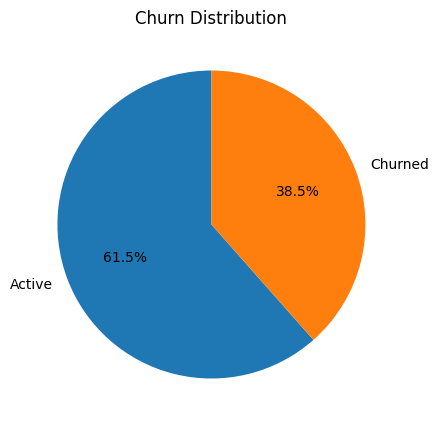

In [6]:
# Create churn flag (1 = churned, 0 = active)
df['is_churned'] = (df['recency'] > 60).astype(int)

# Quick look at distribution
df['is_churned'].value_counts(normalize=True).plot.pie(
    labels=["Active", "Churned"], autopct='%1.1f%%', startangle=90, figsize=(5,5), title="Churn Distribution"
)
plt.ylabel("")
plt.show()


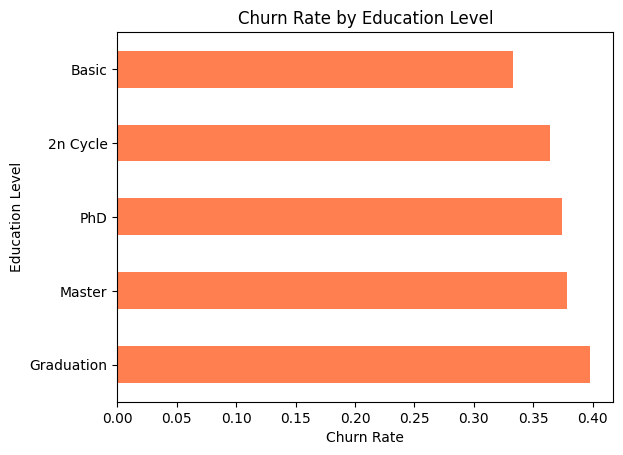

In [7]:
churn_by_education = df.groupby('education')['is_churned'].mean().sort_values(ascending=False)

churn_by_education.plot(kind='barh', color='coral', title='Churn Rate by Education Level')
plt.xlabel('Churn Rate')
plt.ylabel('Education Level')
plt.show()



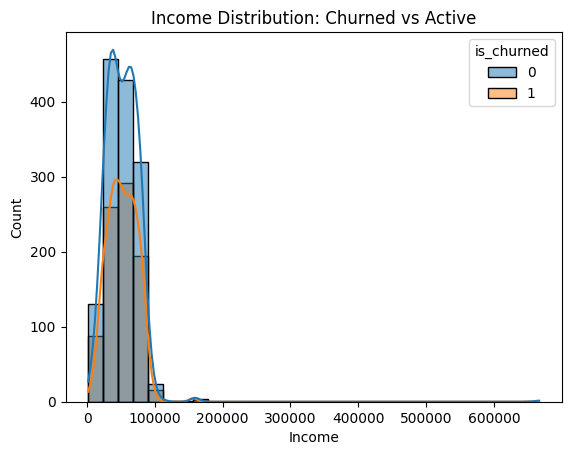

In [8]:
sns.histplot(data=df, x='income', hue='is_churned', bins=30, kde=True)
plt.title("Income Distribution: Churned vs Active")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

